## This is interview tasks for RSB

## Task 1.
![task1](images/task1.png)

Последовательно будем тянуть по одной детали из мешка, в котором лежить 95 хороших и 5 бракованных деталей. Нас интересует случай, когда на каждом шаге достается хорошая деталь. Рассмотрим вероятность вытянуть хорошую деталь по шагам:

1. 95 / 100
2. 94 / 99
3. 93 / 98
4. 92 / 97

Таким образом, вероятность, что мы достали только хорошие детали, будет являться произведением данных вероятностей

In [51]:
res = (95 * 94 * 93 * 92) / (100 * 99 * 98 * 97)
print(res)

0.8118751155570006


## Task 2.
![task2](images/task2.png)

В книге [link](https://scask.ru/m_book_prs1.php?id=54) показано, что оценка максимального правдоподобия для параметра экспоненциального распределения может быть получена как обратная величина к среднему арифметическому экспериментальных значений

In [52]:
import numpy as np

x_list = np.array([10, 14, 18, 8, 20])
x_mean = np.mean(x_list)
thetta_mle = 1 / x_mean
print(thetta_mle)

0.07142857142857142


## Task 4.

Написать код SQL – запроса к таблице данных из задачи 3 (каждая задача решается одним запросом):
1)	Количество уникальных/неуникальных Client_id.
2)	Посчитать долю значений целевого признака (target=1) в разрезе категорий образования.
3)	На сколько в среднем доход семьи заемщиков с Client_id=2n, больше дохода семьи заемщиков с Client_id=2n+1, где n - произвольное целое число.


![task3](images/task3.PNG)

Здесь использовался синтаксис PostgreSQL

1) Количество уникальных/неуникальных Client_id
   ```
   SELECT
        COUNT(
            CASE
                WHEN aggregated.cnt > 1 THEN 1
                ELSE 0
            END
        ) as non_uniq_cnt,
        COUNT(
            CASE
                WHEN aggregated.cnt == 1 THEN 1
                ELSE 0
            END
        ) as uniq_cnt
    FROM (
        SELECT COUNT(1)
        FROM table
        GROUP BY CLIENT_ID
    ) as aggregated;
    ```


2) Посчитать долю значений целевого признака (target=1) в разрезе категорий образования. Здесь я полагаю, что доля значений -- это отношение количества людей с таргетом 1 ко всем людям.
   ```
    SELECT AVG(Target)
    FROM table
    GROUP BY Education
    ```

3) На сколько в среднем доход семьи заемщиков с Client_id=2n, больше дохода семьи заемщиков с Client_id=2n+1, где n - произвольное целое число.
    ```
    SELECT
        AVG(PROFIT_FAMILY) FILTER (WHERE CLIENT_ID % 2  == 0) -
            AVG(PROFIT_FAMILY) FILTER (WHERE CLIENT_ID % 2  == 1)
            AS DELTA
    FROM table
    GROUP BY CLIENT_ID;
    ```




## Task 5.

1)	В dataframe с именем subset_1 сохраните только первые 20 строк и только 1 и 5 колонку.

2)	В dataframe subset_2 сохраните только тех клиентов-мужчин, у которых значения переменной STANDING_IN_MONTHS_LAST строго больше 50.

3)	Создайте две новые переменных:
CI = DCI + UCI
CI_ln = натуральный логарифм переменной CI.

4)	Для данных рассчитайте среднее значение переменной CI для каждого типа образования (переменная EDUCATION), в получившемся dataframe переменная EDUCATION не должна превратиться в индекс. Также переименуйте колонку со средним значением CI в MEAN_CI.

5)	В переменной TRANSPORT_AMOUNT замените все отрицательные значения на медианное значение переменной TRANSPORT_AMOUNT (без учета отрицательных значений, разумеется).


In [53]:
import pandas as pd
import numpy as np

df = pd.read_csv("Interview-RSB-scoring/datasets/appl_score_sample.csv", delimiter=";")
df

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,Target
0,1,1,0,1,0,1,14370.2002,14370.2002,0.0,0,26,3,1,1
1,2,1,1,1,0,0,28312.8594,33312.8594,0.0,1,19,3,2,1
2,3,1,0,0,0,1,34729.5117,34729.5117,0.0,0,66,3,0,1
3,4,0,0,0,0,0,28738.4707,28738.4707,0.0,0,20,3,0,1
4,5,0,1,0,0,0,73310.0000,73310.0000,0.0,0,25,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,2158,1,0,0,0,0,12006.0000,12000.0000,0.0,0,8,3,0,0
2159,2159,1,1,1,1,0,0.0000,25000.0000,0.0,0,0,6,0,0
2160,2160,1,0,0,0,0,6500.0000,6500.0000,0.0,0,12,4,0,0
2161,2161,1,0,0,0,1,8248.6504,25000.0000,15000.0,0,12,6,0,0


In [54]:
#task 1
columns = df.columns
req_columns = columns[[0, 4]]
subset_1 = df.iloc[:20][req_columns]
subset_1

,CLIENT_ID,ACCOUNTS_FLAG
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,1
7,8,0
8,9,0
9,10,0


In [55]:
#task 2
subset_2 = df.loc[(df.SEX == 1) & (df.STANDING_IN_MONTHS_LAST > 50)]
subset_2

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,Target
2,3,1,0,0,0,1,34729.5117,34729.5117,0.0,0,66,3,0,1
6,7,1,0,1,1,0,0.0000,16243.8096,7000.0,0,71,5,1,1
7,8,1,1,1,0,0,17400.0000,17400.0000,0.0,0,59,3,3,1
8,9,1,1,1,0,0,33383.8203,48383.8203,0.0,0,228,5,0,1
12,13,1,0,1,0,0,16504.9004,36000.0000,0.0,0,90,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,2102,1,0,0,0,0,12734.6699,20000.0000,0.0,0,80,5,0,0
2123,2123,1,1,1,0,0,31134.3398,41134.3398,0.0,1,93,6,0,0
2125,2125,1,1,1,0,0,87000.0000,200000.0000,0.0,1,141,3,0,0
2132,2132,1,1,1,0,0,30390.2598,51390.2617,11000.0,0,53,3,0,0


In [56]:
# task 3
df_ci = df.copy()
df_ci["CI"] = df_ci.DCI + df_ci.UCI
# here i sum with 1 to make logarithms >= 0
df_ci["CI_ln"] = np.log(1 + df_ci["CI"])
df_ci

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,Target,CI,CI_ln
0,1,1,0,1,0,1,14370.2002,14370.2002,0.0,0,26,3,1,1,14370.2002,9.572981
1,2,1,1,1,0,0,28312.8594,33312.8594,0.0,1,19,3,2,1,28312.8594,10.251107
2,3,1,0,0,0,1,34729.5117,34729.5117,0.0,0,66,3,0,1,34729.5117,10.455374
3,4,0,0,0,0,0,28738.4707,28738.4707,0.0,0,20,3,0,1,28738.4707,10.266027
4,5,0,1,0,0,0,73310.0000,73310.0000,0.0,0,25,3,0,1,73310.0000,11.202466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,2158,1,0,0,0,0,12006.0000,12000.0000,0.0,0,8,3,0,0,12006.0000,9.393245
2159,2159,1,1,1,1,0,0.0000,25000.0000,0.0,0,0,6,0,0,0.0000,0.000000
2160,2160,1,0,0,0,0,6500.0000,6500.0000,0.0,0,12,4,0,0,6500.0000,8.779711
2161,2161,1,0,0,0,1,8248.6504,25000.0000,15000.0,0,12,6,0,0,23248.6504,10.054045


In [57]:
# task 4
df_mean_ci = df_ci.copy()
df_mean_ci = df_mean_ci.groupby(["EDUCATION"], as_index=False).CI.mean()
df_mean_ci.rename(columns={"CI" : "MEAN_CI"}, inplace=True)
df_mean_ci

,EDUCATION,MEAN_CI
0,1,53619.594300
1,2,54825.425270
2,3,36233.867539
3,4,19460.352806
4,5,19222.891376
5,6,16195.841409
6,7,16083.252920


In [58]:
# task 5
df_transport = df_ci.copy()
mean_transport_amount = df_transport.loc[df_transport.TRANSPORT_AMOUNT >= 0].TRANSPORT_AMOUNT.mean()
df_transport.TRANSPORT_AMOUNT = df_transport.TRANSPORT_AMOUNT.apply(lambda x : x if x >= 0 else mean_transport_amount)
df_transport

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,Target,CI,CI_ln
0,1,1,0,1,0,1,14370.2002,14370.2002,0.0,0,26,3,1.0,1,14370.2002,9.572981
1,2,1,1,1,0,0,28312.8594,33312.8594,0.0,1,19,3,2.0,1,28312.8594,10.251107
2,3,1,0,0,0,1,34729.5117,34729.5117,0.0,0,66,3,0.0,1,34729.5117,10.455374
3,4,0,0,0,0,0,28738.4707,28738.4707,0.0,0,20,3,0.0,1,28738.4707,10.266027
4,5,0,1,0,0,0,73310.0000,73310.0000,0.0,0,25,3,0.0,1,73310.0000,11.202466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,2158,1,0,0,0,0,12006.0000,12000.0000,0.0,0,8,3,0.0,0,12006.0000,9.393245
2159,2159,1,1,1,1,0,0.0000,25000.0000,0.0,0,0,6,0.0,0,0.0000,0.000000
2160,2160,1,0,0,0,0,6500.0000,6500.0000,0.0,0,12,4,0.0,0,6500.0000,8.779711
2161,2161,1,0,0,0,1,8248.6504,25000.0000,15000.0,0,12,6,0.0,0,23248.6504,10.054045


In [59]:
print(df_transport.TRANSPORT_AMOUNT.unique())

[1.         2.         0.         3.         0.23551229]


## Task 3.
Необходимо любым способом (на выбор кандидата) с наибольшей точностью с помощью информации из Task 4 спрогнозировать целевой признак Тarget (бинарный признак 1/0).
1)	Выбор метода моделирования и итоговой модели обосновать. Обоснование необходимо сделать по максимально возможному количеству критериев.
2)	Является ли Ваш прогноз стабильным? Не переобучили ли Вы модель? (обосновать)


### Overview data

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df_transport

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,Target,CI,CI_ln
0,1,1,0,1,0,1,14370.2002,14370.2002,0.0,0,26,3,1.0,1,14370.2002,9.572981
1,2,1,1,1,0,0,28312.8594,33312.8594,0.0,1,19,3,2.0,1,28312.8594,10.251107
2,3,1,0,0,0,1,34729.5117,34729.5117,0.0,0,66,3,0.0,1,34729.5117,10.455374
3,4,0,0,0,0,0,28738.4707,28738.4707,0.0,0,20,3,0.0,1,28738.4707,10.266027
4,5,0,1,0,0,0,73310.0000,73310.0000,0.0,0,25,3,0.0,1,73310.0000,11.202466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,2158,1,0,0,0,0,12006.0000,12000.0000,0.0,0,8,3,0.0,0,12006.0000,9.393245
2159,2159,1,1,1,1,0,0.0000,25000.0000,0.0,0,0,6,0.0,0,0.0000,0.000000
2160,2160,1,0,0,0,0,6500.0000,6500.0000,0.0,0,12,4,0.0,0,6500.0000,8.779711
2161,2161,1,0,0,0,1,8248.6504,25000.0000,15000.0,0,12,6,0.0,0,23248.6504,10.054045


### Будем последовательно обрабатывать данные и придумывать инсайты.
P.S. Каждый новый раунд сопровождается вычислением пайплайна из различных моделей. Каждый новый раунд призван увеличивать качество результатов. Поэтому как результат будут выдаваться скоры для последних нескольких раундов.
### Round 1

<AxesSubplot:>

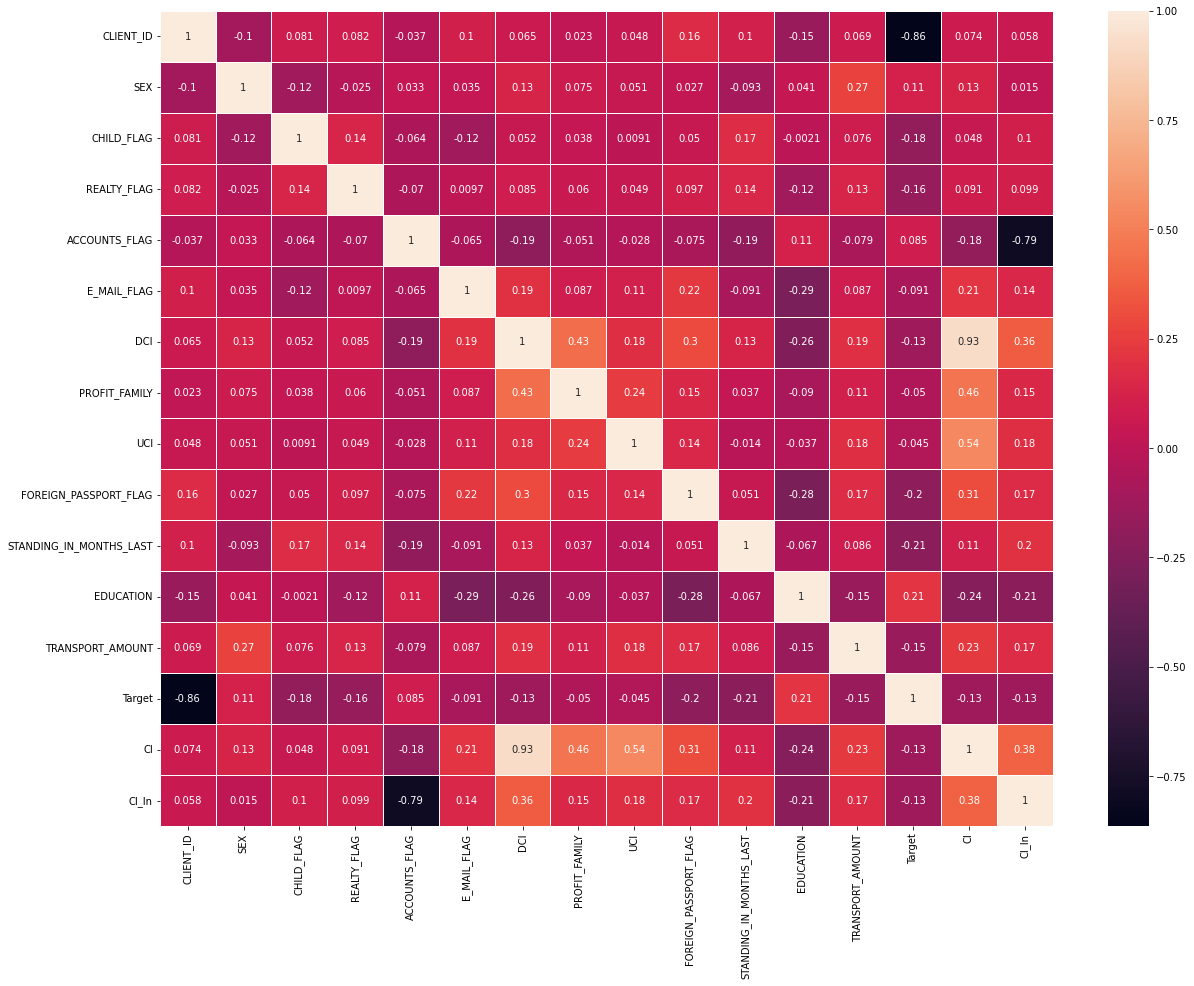

In [62]:
plt.figure(figsize = (20,15))
sns.heatmap(df_transport.corr(), annot=True, linewidth=0.5)

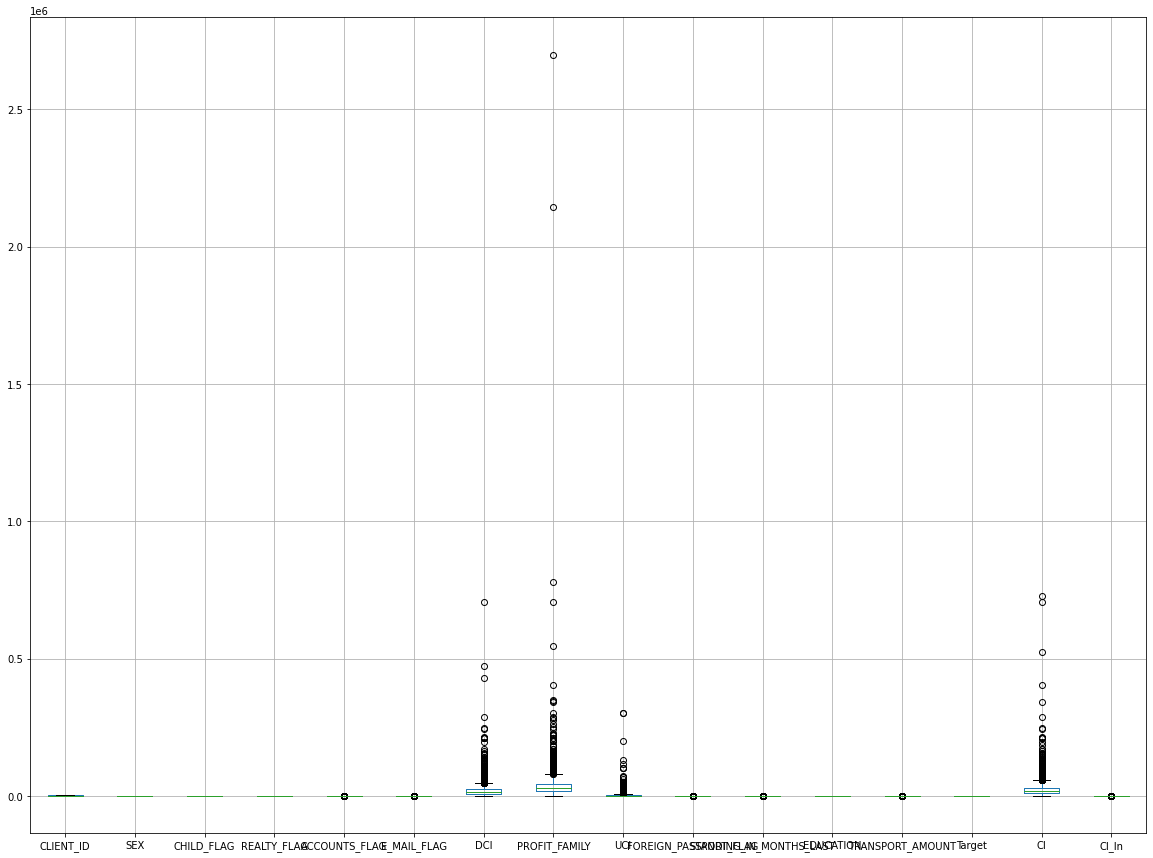

In [63]:
plt.figure(figsize = (20, 15))
boxplot = df_transport.boxplot()

### Insights:
1. Сильная антикорреляция ID клиента и таргета -> удалить ID клиента
2. Сильная корреляция CI, DCI, UCI, PROFIT_FAMILY -> рассчитать профит семьи без человека, берущего кредит: PROFIT_PARTNER = PROFIT_FAMILY - CI. Нужно посмотреть, обратится ли что-то в отрицательыне значения, и обратить в 0.
3. Составить логарифмические колонки CI и PROFIT_PARTNER, остальную информацию про деньги удалить.
4.  Сильная корреляция ACCOUNTS_FLAG И CI_LN.


In [64]:
df_round_1 = df_transport.copy()
df_round_1.drop("CLIENT_ID", inplace=True, axis=1)
df_round_1["PROFIT_PARTNER"] = df_round_1.PROFIT_FAMILY - df_round_1.CI
df_round_1.PROFIT_PARTNER = df_round_1.PROFIT_PARTNER.apply(lambda x : x if x >= 0 else 0)
df_round_1["PROFIT_PARTNER_ln"] = np.log(1 + df_round_1["PROFIT_PARTNER"])
df_round_1.drop(["DCI", "PROFIT_FAMILY", "UCI", "CI", "PROFIT_PARTNER"], inplace=True, axis=1)
df_round_1

,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_FLAG,E_MAIL_FLAG,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,Target,CI_ln,PROFIT_PARTNER_ln
0,1,0,1,0,1,0,26,3,1.0,1,9.572981,0.000000
1,1,1,1,0,0,1,19,3,2.0,1,10.251107,8.517393
2,1,0,0,0,1,0,66,3,0.0,1,10.455374,0.000000
3,0,0,0,0,0,0,20,3,0.0,1,10.266027,0.000000
4,0,1,0,0,0,0,25,3,0.0,1,11.202466,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2158,1,0,0,0,0,0,8,3,0.0,0,9.393245,0.000000
2159,1,1,1,1,0,0,0,6,0.0,0,0.000000,10.126671
2160,1,0,0,0,0,0,12,4,0.0,0,8.779711,0.000000
2161,1,0,0,0,1,0,12,6,0.0,0,10.054045,7.468713


### Round 2

<AxesSubplot:>

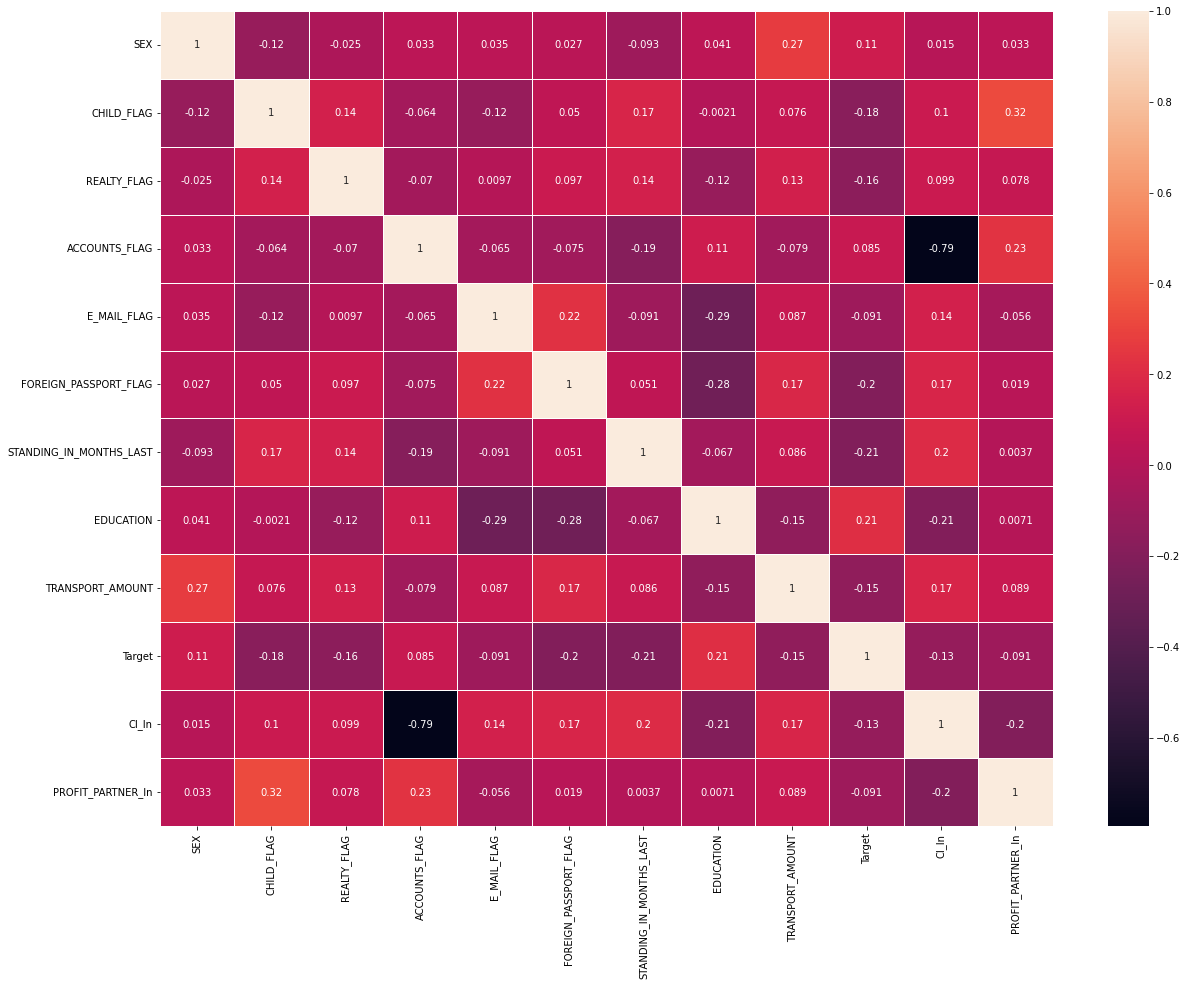

In [65]:
plt.figure(figsize = (20,15))
sns.heatmap(df_round_1.corr(), annot=True, linewidth=0.5)

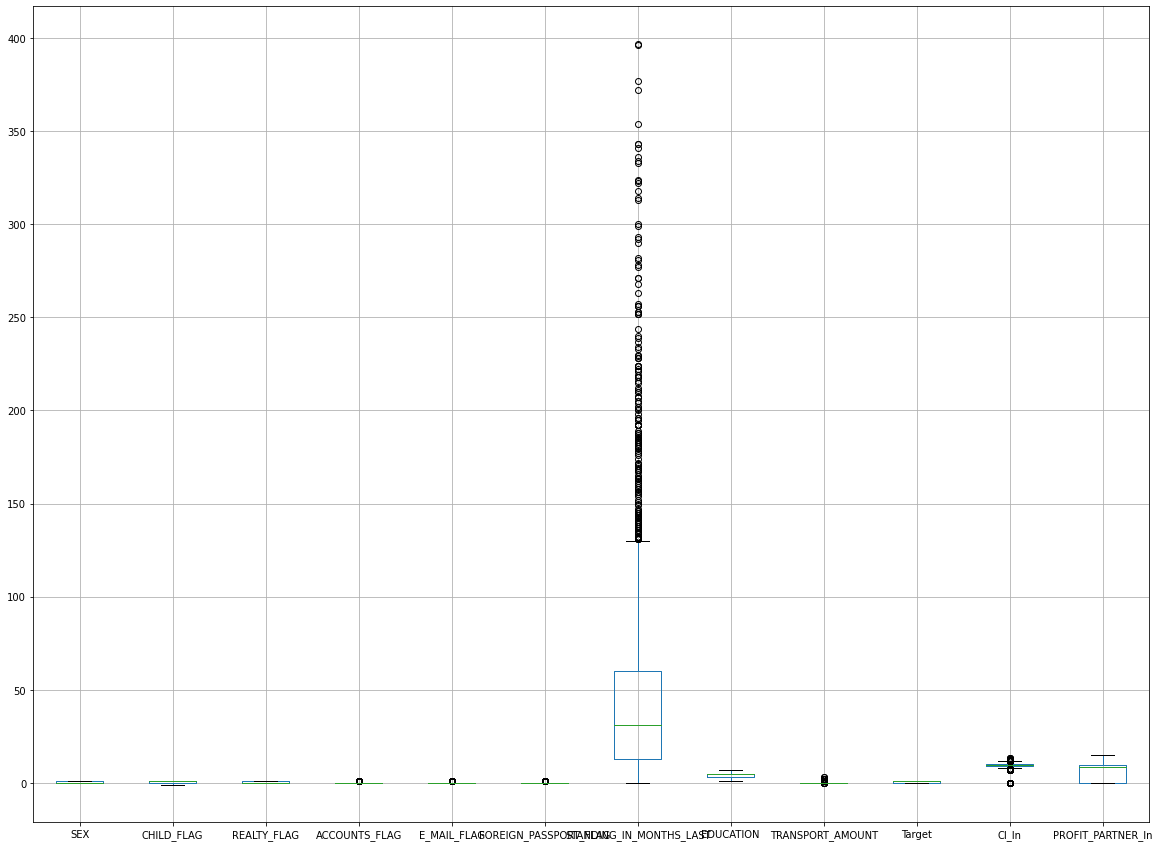

In [66]:
plt.figure(figsize = (20, 15))
boxplot = df_round_1.boxplot()

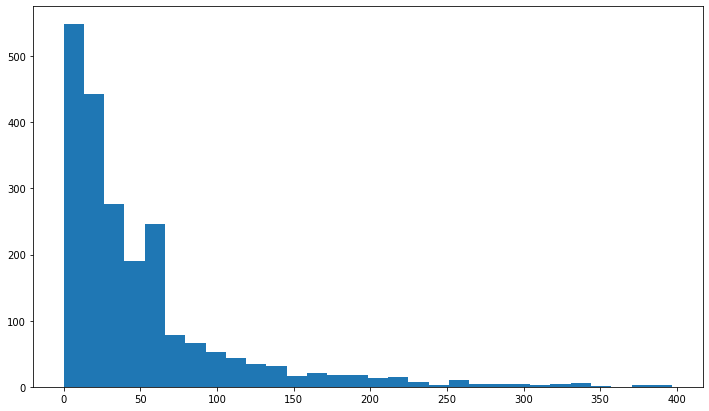

In [67]:
# problem 1. STANDING_IN_MONTHS_LAST have exponential distribution
plt.figure(figsize = (12, 7))
plt.hist(df_round_1.STANDING_IN_MONTHS_LAST, bins=30)
plt.show()

### Insights:
1. Колонка STANDING_IN_MONTHS_LAST имеет слишком большой разброс, и ее нужно перенормировать. Самое очевидное -- вычесть среднее и поделить на стандартное отклонение. Но в случае с экспоненциальным распределением лучше просто поделить на среднее значение, чтобы значения колонки не переходили в отрицательную область. Было протестированно и так и так, в результате первый вариант дает лучшие результаты.

In [68]:
df_round_2 = df_round_1.copy()
df_round_2["STANDING_MONTHS_NORM"] = (df_round_2.STANDING_IN_MONTHS_LAST - df_round_2.STANDING_IN_MONTHS_LAST.mean()) / df_round_2.STANDING_IN_MONTHS_LAST.std()
#df_round_2["STANDING_MONTHS_NORM"] = df_round_2.STANDING_IN_MONTHS_LAST / df_round_2.STANDING_IN_MONTHS_LAST.mean()
df_round_2.drop("STANDING_IN_MONTHS_LAST", inplace=True, axis=1)
df_round_2

,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_FLAG,E_MAIL_FLAG,FOREIGN_PASSPORT_FLAG,EDUCATION,TRANSPORT_AMOUNT,Target,CI_ln,PROFIT_PARTNER_ln,STANDING_MONTHS_NORM
0,1,0,1,0,1,0,3,1.0,1,9.572981,0.000000,-0.410274
1,1,1,1,0,0,1,3,2.0,1,10.251107,8.517393,-0.530733
2,1,0,0,0,1,0,3,0.0,1,10.455374,0.000000,0.278064
3,0,0,0,0,0,0,3,0.0,1,10.266027,0.000000,-0.513525
4,0,1,0,0,0,0,3,0.0,1,11.202466,0.000000,-0.427482
...,...,...,...,...,...,...,...,...,...,...,...,...
2158,1,0,0,0,0,0,3,0.0,0,9.393245,0.000000,-0.720026
2159,1,1,1,1,0,0,6,0.0,0,0.000000,10.126671,-0.857693
2160,1,0,0,0,0,0,4,0.0,0,8.779711,0.000000,-0.651192
2161,1,0,0,0,1,0,6,0.0,0,10.054045,7.468713,-0.651192


## Round 3

<AxesSubplot:>

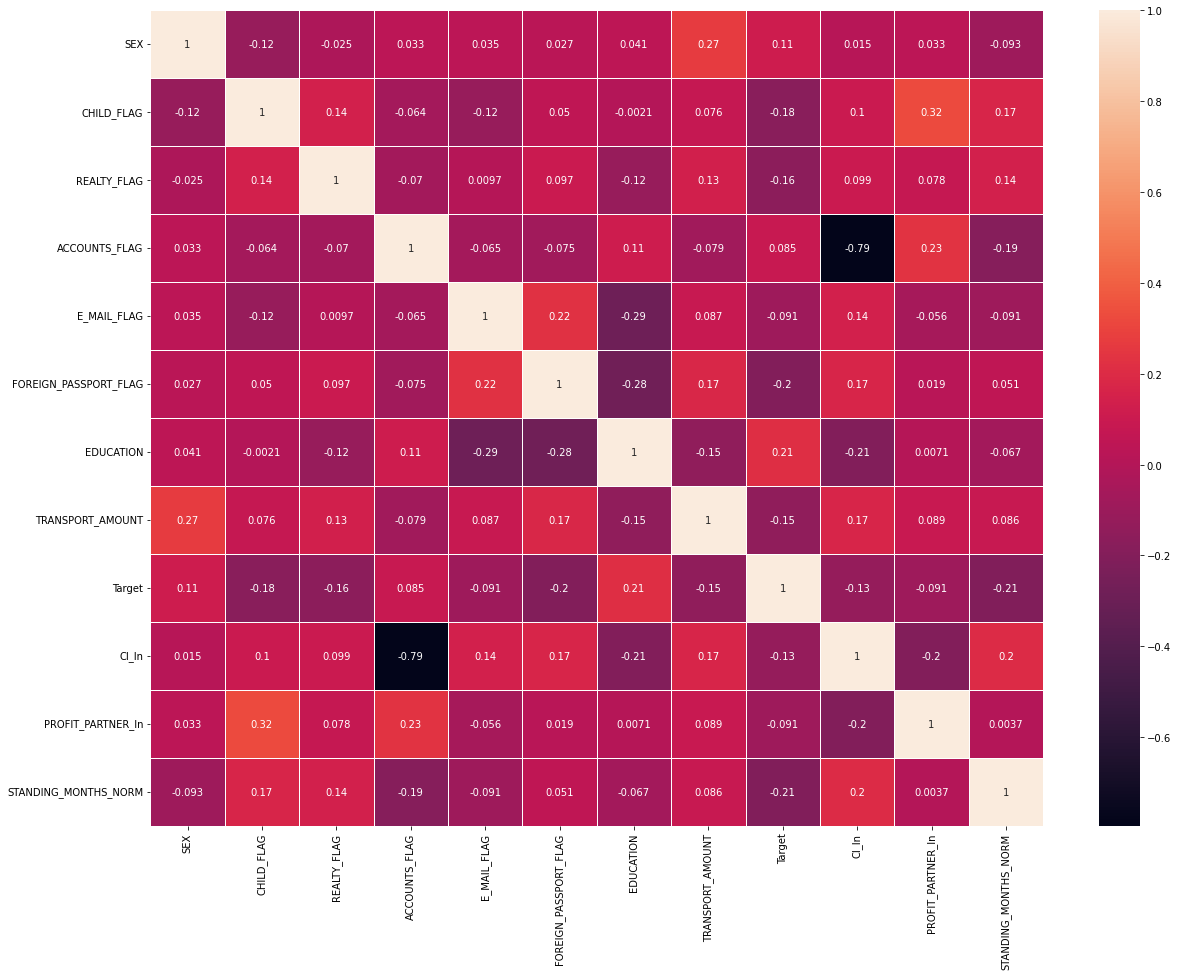

In [69]:
plt.figure(figsize = (20,15))
sns.heatmap(df_round_2.corr(), annot=True, linewidth=0.5)

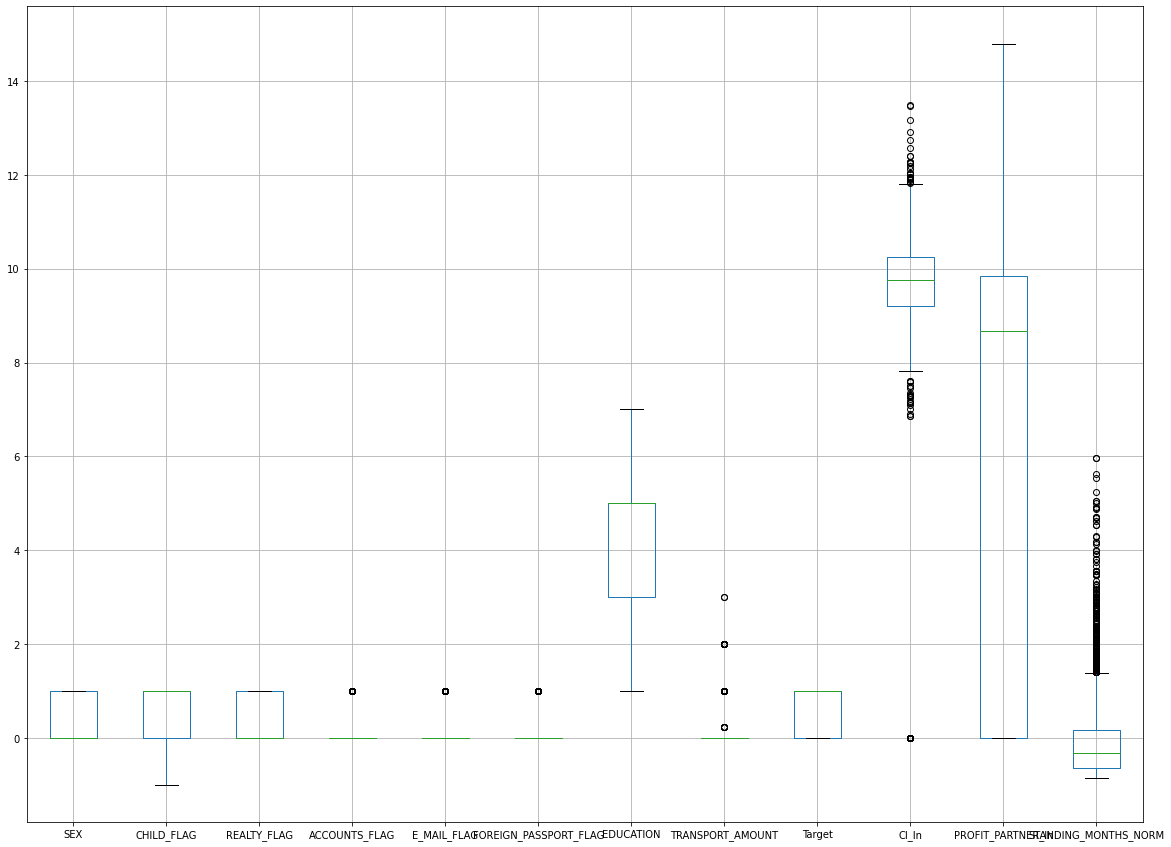

In [70]:
plt.figure(figsize = (20, 15))
boxplot = df_round_2.boxplot()

In [71]:
# problem 1. which child flags exists
print(df_round_2.CHILD_FLAG.unique())

[ 0  1 -1]


In [72]:
print(df_round_2.EDUCATION.unique())

[3 5 6 4 2 7 1]


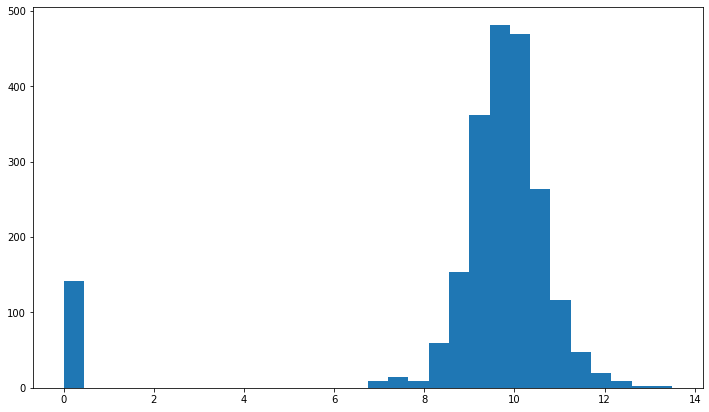

In [73]:
# CI_ln -- essentially not a problem
plt.figure(figsize = (12, 7))
plt.hist(df_round_2.CI_ln, bins=30)
plt.show()

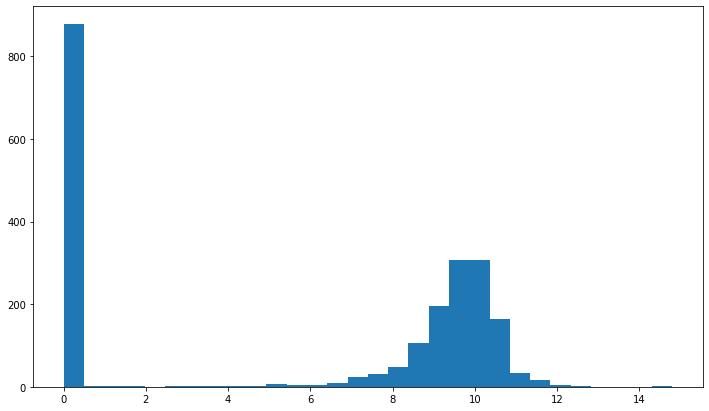

In [74]:
# PROFIT_PARTNER_ln -- essentially not a problem
plt.figure(figsize = (12, 7))
plt.hist(df_round_2.PROFIT_PARTNER_ln, bins=30)
plt.show()

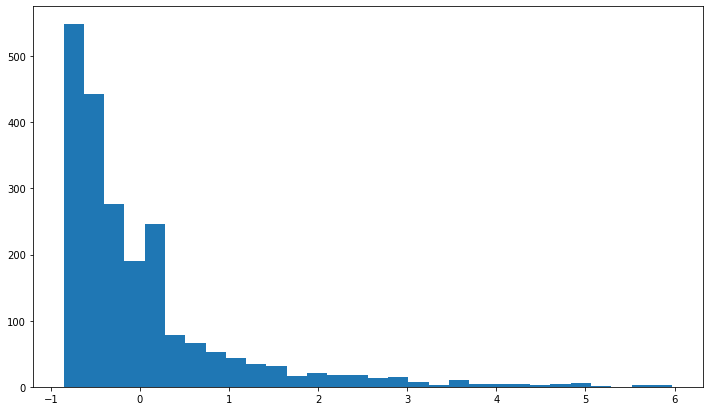

In [75]:
# problem 2. STANDING_MONTHS_NORM steel have exponential distribution. But now it's normalized
plt.figure(figsize = (12, 7))
plt.hist(df_round_2.STANDING_MONTHS_NORM, bins=30)
plt.show()

In [76]:
df_round_2.STANDING_MONTHS_NORM.quantile(0.98)

3.164952854296693

## Insights (которые не будут реализованы):
1. Наличие ребенка и машин можно перевести в денежный формат, приблизительно оценив затрачиваемое количество денег в месяц. Очевидная проблема датасета в том, что не указано точное количество детей, а также некоторые пользователи не указали наличие или отсутствие ребенка (стоит значение -1). Рассмотрим две ситуации -- когда -1 означает, что ребенка нет, и когда мы присваиваем среднее значение по колонке детей (без учета -1). Тогда, грубо говоря и с большими оговорками, это будет рассматриваться как вероятность того, что пользователь имеет ребенка.
2. Проблема оценки затрат на машины -- мы не знаем марку машины, как часто клиент ей пользуется. А если у клиента несколько машин, то, вероятно, он тратит деньги на ежемесячное обслуживание одной "усредненной машины", а за год он платит налог и страховку за все машины.
3. Скорее всего, семья, которая много получает, будет тратить на ребенка, свои нужды, автомобиль и др. больше денег, чем семья, которая мало получает. Это также можно оценить некоторой функцией. Если мы будем использовать НН, то эта зависимость должна выделиться автоматически, а вот линейной регрессии и деревьям будет достаточно сложно. Пока что не будем включать данный пункт в наш бэйзлайн.


## Insights (которые релизованы)
1. Сделаем dummies от некоторых колонок датасета, таких как: SEX, CHILD_FLAG, ACC
2. Обрежем экспоненциальное распределение в STANDING_MONTHS_NORM по квантилю 98 %


In [77]:
df_round_3 = df_round_2.copy()
mean_child_flag = df_round_3.loc[df_round_3.CHILD_FLAG >= 0].CHILD_FLAG.mean()
df_round_3.CHILD_FLAG = df_round_3.CHILD_FLAG.apply(lambda x : x if x >= 0 else mean_child_flag)

standing_months_right_quantile = df_round_3.STANDING_MONTHS_NORM.quantile(0.98)
df_round_3.STANDING_MONTHS_NORM = df_round_3.STANDING_MONTHS_NORM.apply(lambda x : x if x <= standing_months_right_quantile else standing_months_right_quantile)

df_round_3_dummies = pd.get_dummies(df_round_3, columns=["CHILD_FLAG", "EDUCATION", "TRANSPORT_AMOUNT"])

## Round 4

<AxesSubplot:>

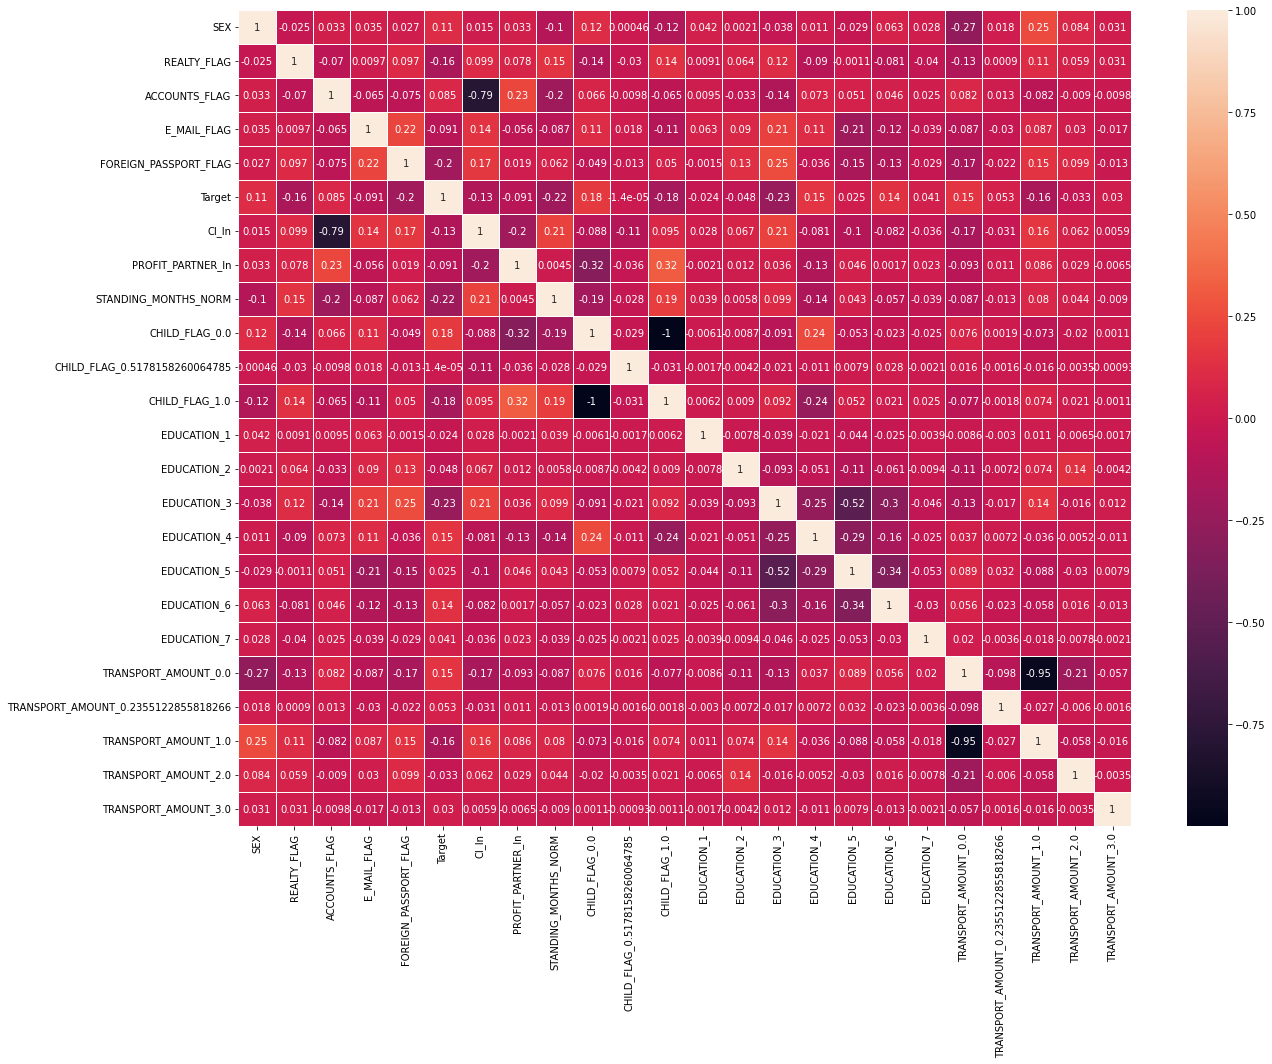

In [78]:
plt.figure(figsize = (20,15))
sns.heatmap(df_round_3_dummies.corr(), annot=True, linewidth=0.5)

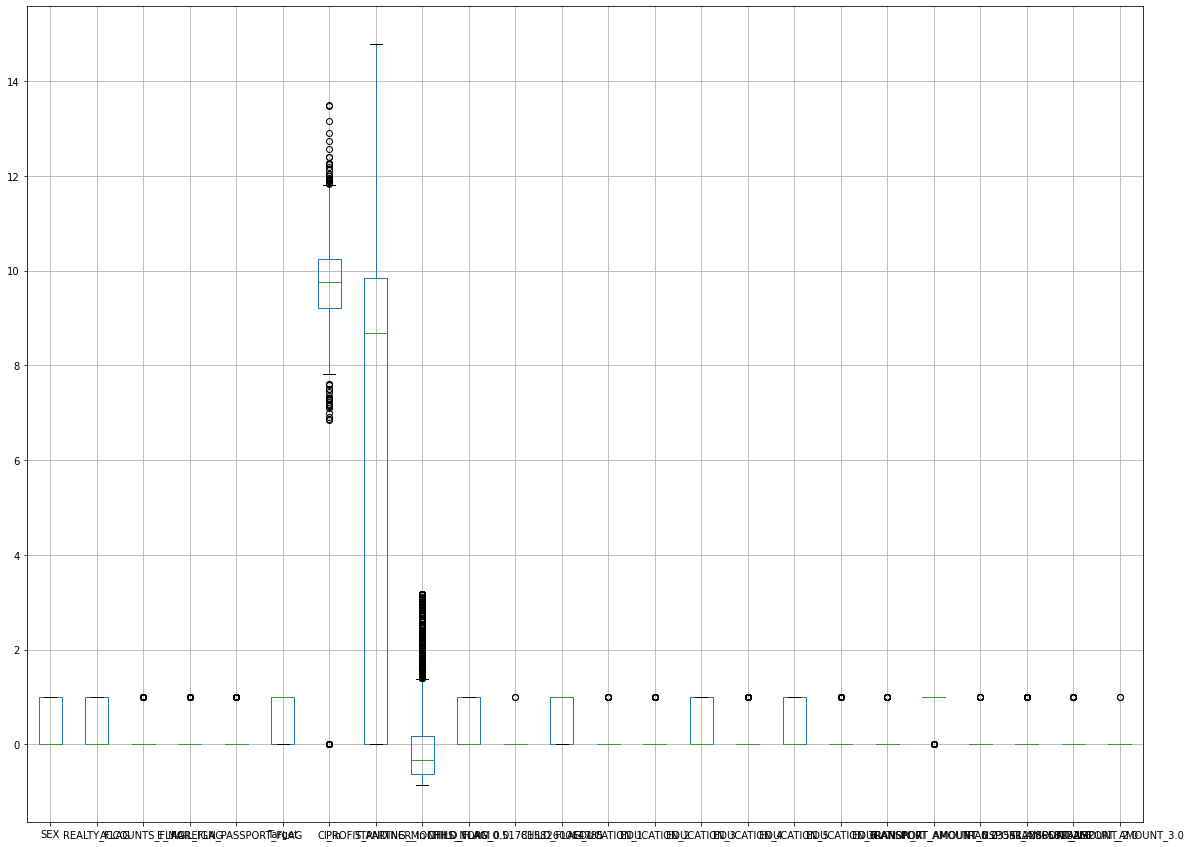

In [79]:
plt.figure(figsize = (20, 15))
boxplot = df_round_3_dummies.boxplot()

## Insights
1. Наблюдается сильная корреляция CHILD_FLAG_1_0 И CHILD_FLAG_0_0. Удалим колонку с 0_0
2. Сильная корреляция TRANSPORT_AMOUNT_1_0 И TRANSPORT_AMOUNT_0_0. Удалим колонку с 0_0

In [80]:
df_round_4 = df_round_3_dummies.copy()
df_round_4.drop(["CHILD_FLAG_0.0", "TRANSPORT_AMOUNT_0.0"], axis=1, inplace=True)

## Round 5

<AxesSubplot:>

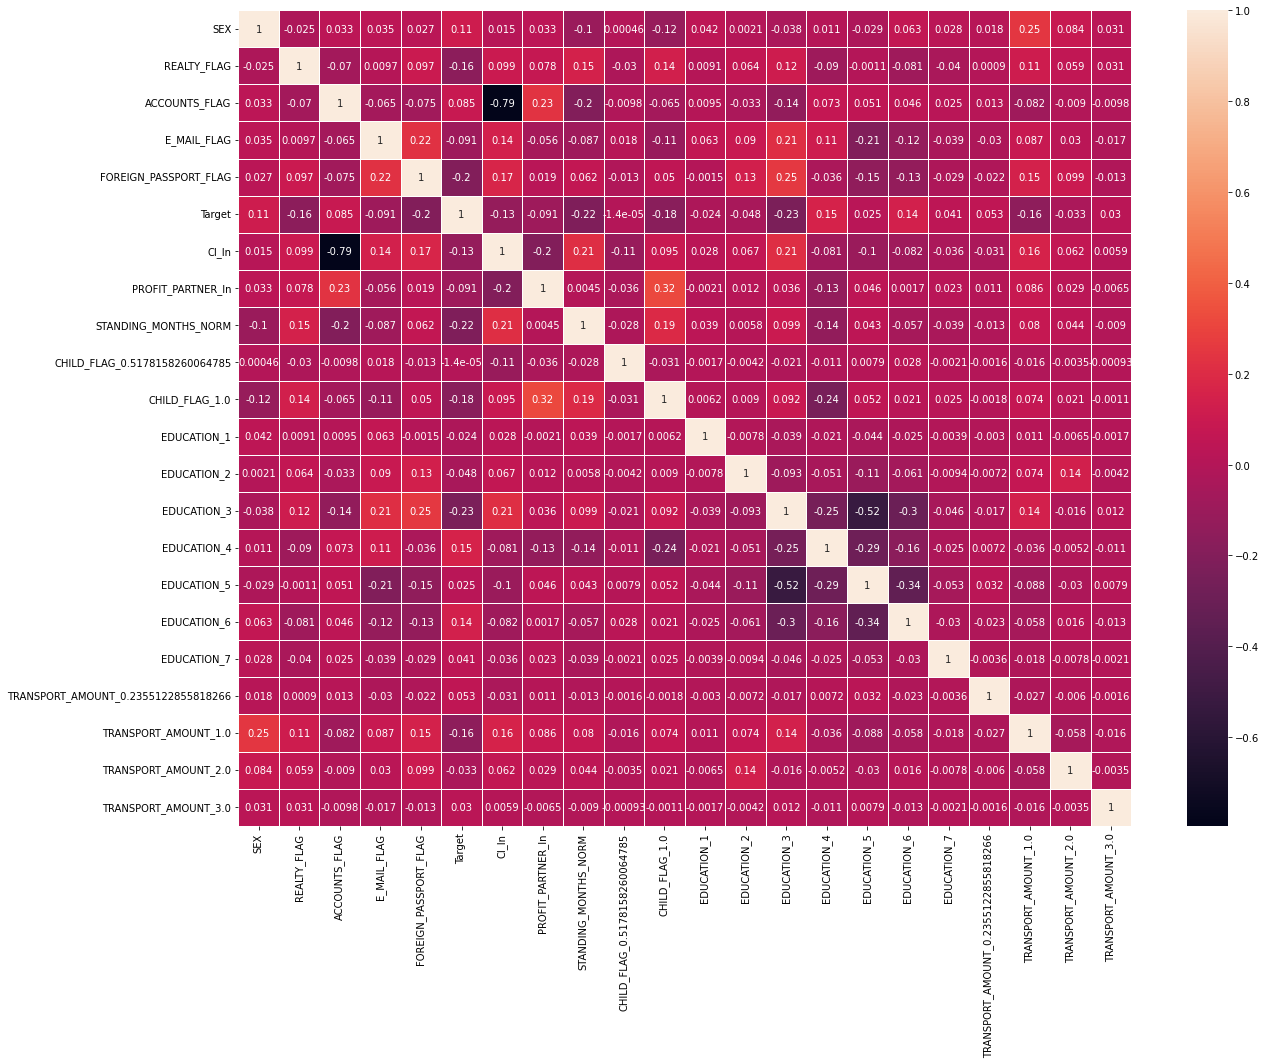

In [81]:
plt.figure(figsize = (20,15))
sns.heatmap(df_round_4.corr(), annot=True, linewidth=0.5)

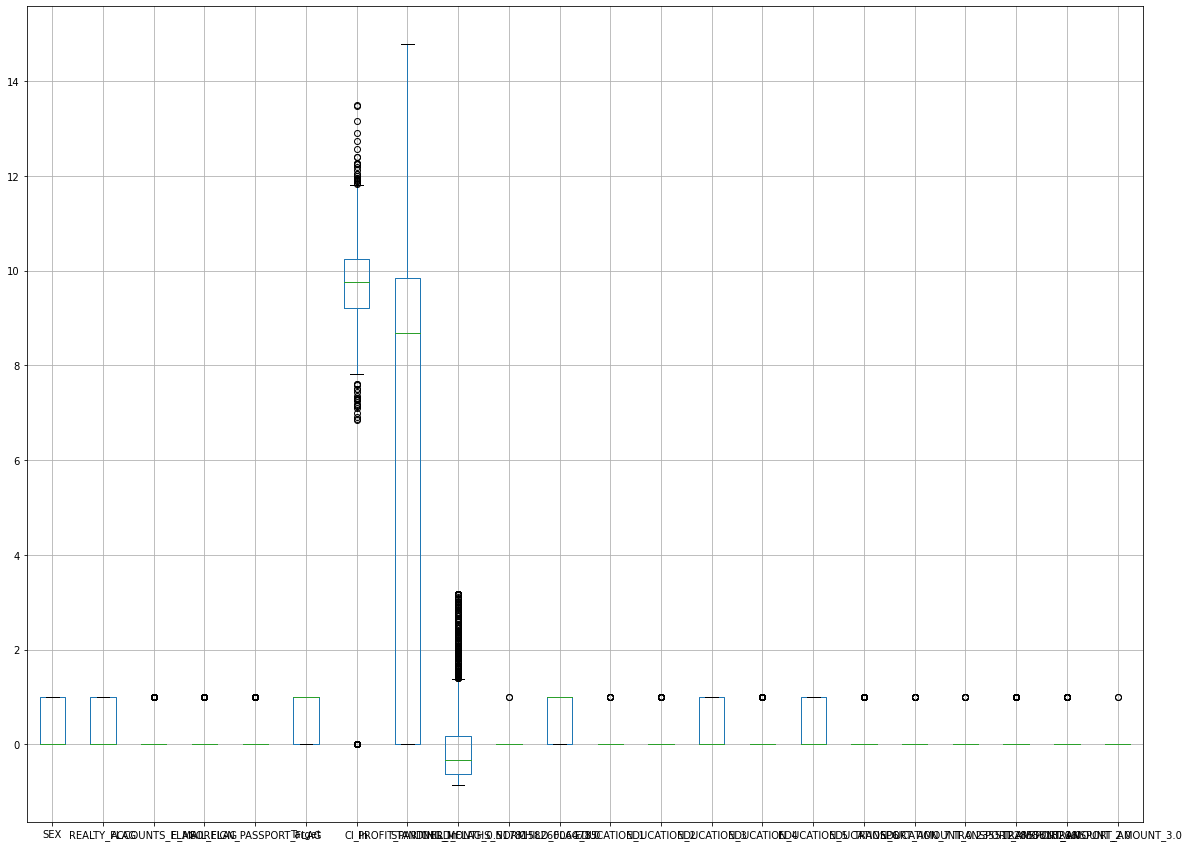

In [82]:
plt.figure(figsize = (20, 15))
boxplot = df_round_4.boxplot()

## Insights:
1. Надо перенормировать колонки CI_ln и PROFIT_PARTNER_ln. Сделаем это так: добавим колонку CI_IS_0 и PROFIT_PARTNER_IS_0. Если там будет 1, то это будет означать, что соответствующие колонки тоже имели значение 0. И они такими и останутся.

In [83]:
df_round_5 = df_round_4.copy()

df_round_5["CI_IS_0"] = df_round_5.CI_ln.apply(lambda x : 1 if x == 0 else 0)
df_round_5["PROFIT_PARTNER_IS_0"] = df_round_5.PROFIT_PARTNER_ln.apply(lambda x : 1 if x == 0 else 0)

mean_ci_ln = df_round_5.loc[df_round_5.CI_ln > 0].CI_ln.mean()
std_ci_ln = df_round_5.loc[df_round_5.CI_ln > 0].CI_ln.std()
mean_partner_ln = df_round_5.loc[df_round_5.PROFIT_PARTNER_ln > 0].PROFIT_PARTNER_ln.mean()
std_partner_ln = df_round_5.loc[df_round_5.PROFIT_PARTNER_ln > 0].PROFIT_PARTNER_ln.std()

df_round_5.CI_ln = df_round_5.CI_ln.apply(lambda x : (x - mean_ci_ln) / std_ci_ln if x > 0 else 0)
df_round_5.PROFIT_PARTNER_ln = df_round_5.PROFIT_PARTNER_ln.apply(lambda x : (x - mean_partner_ln) / std_partner_ln if x > 0 else 0)



## Round 6

In [84]:
df_round_5.T

,0,1,2,3,4,5,6,7,8,9,...,2153,2154,2155,2156,2157,2158,2159,2160,2161,2162
SEX,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
REALTY_FLAG,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
ACCOUNTS_FLAG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
E_MAIL_FLAG,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
FOREIGN_PASSPORT_FLAG,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Target,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CI_ln,-0.321183,0.524518,0.779264,0.543126,1.710975,0.414426,-1.218076,-0.082608,0.729981,-0.171901,...,-0.349429,0.209002,0.277557,-0.267278,1.073791,-0.545335,0.000000,-1.310484,0.278760,1.579260
PROFIT_PARTNER_ln,0.000000,-0.348665,0.000000,0.000000,0.000000,0.051129,-0.039893,0.000000,0.203364,0.161550,...,-4.445950,-1.149040,0.390627,-0.349168,0.865503,0.000000,0.460060,0.000000,-0.875668,-0.189176
STANDING_MONTHS_NORM,-0.410274,-0.530733,0.278064,-0.513525,-0.427482,-0.203773,0.364106,0.157605,3.065832,0.364106,...,-0.685609,-0.066105,-0.238189,-0.530733,-0.737234,-0.720026,-0.857693,-0.651192,-0.651192,-0.152147
CHILD_FLAG_0.5178158260064785,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


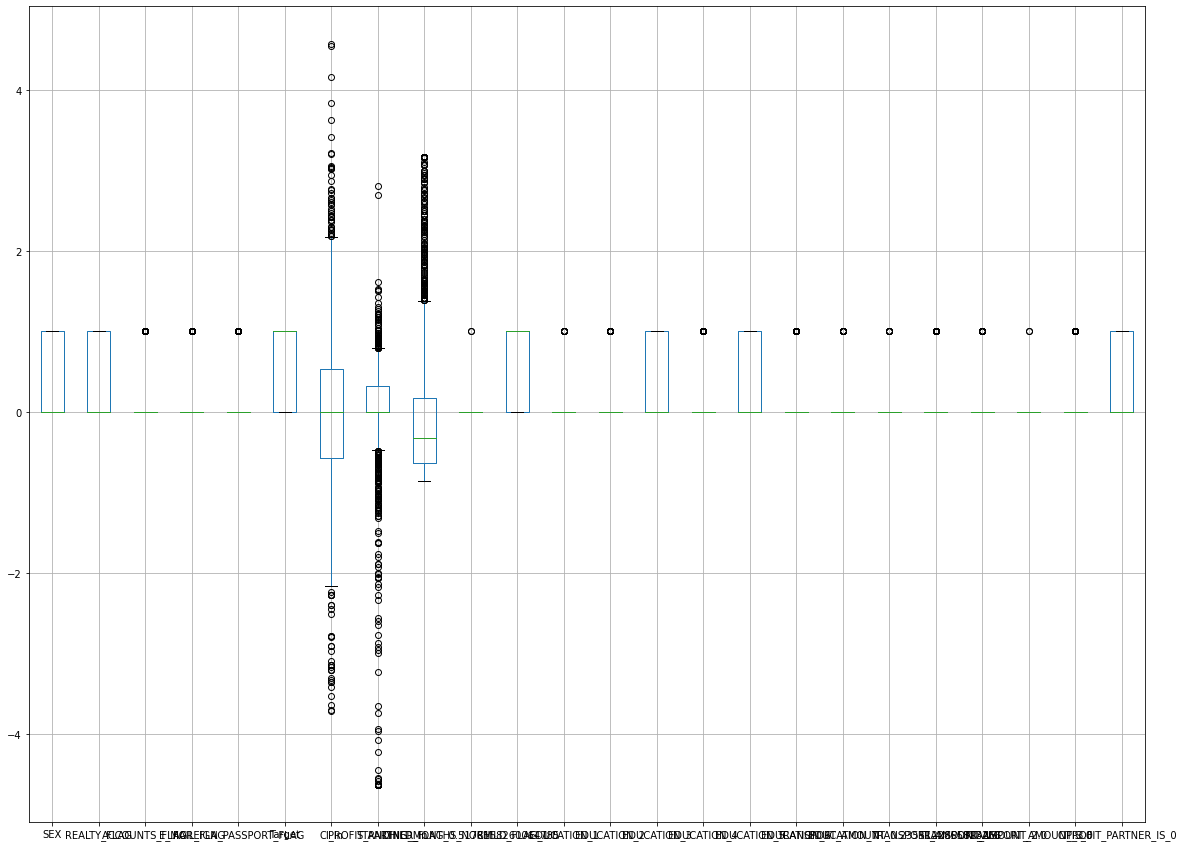

In [85]:
plt.figure(figsize = (20, 15))
boxplot = df_round_5.boxplot()

-1.6495449370976443 1.0990578825895314


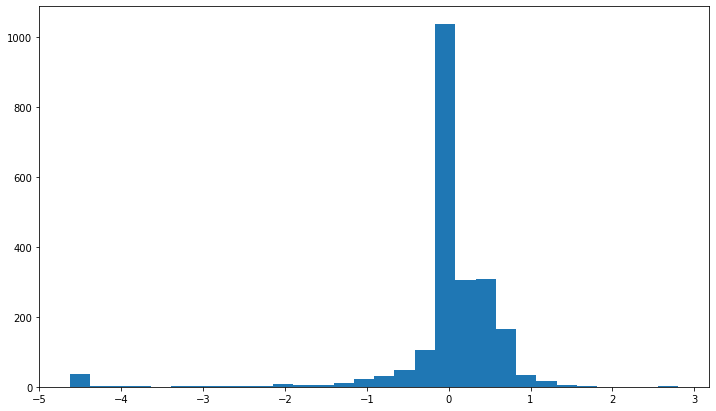

In [86]:
plt.figure(figsize = (12, 7))
plt.hist(df_round_5.PROFIT_PARTNER_ln, bins=30)
print(df_round_5.PROFIT_PARTNER_ln.quantile(0.03), df_round_5.PROFIT_PARTNER_ln.quantile(0.99))
plt.show()

-2.778814833271165 2.5948337440203812


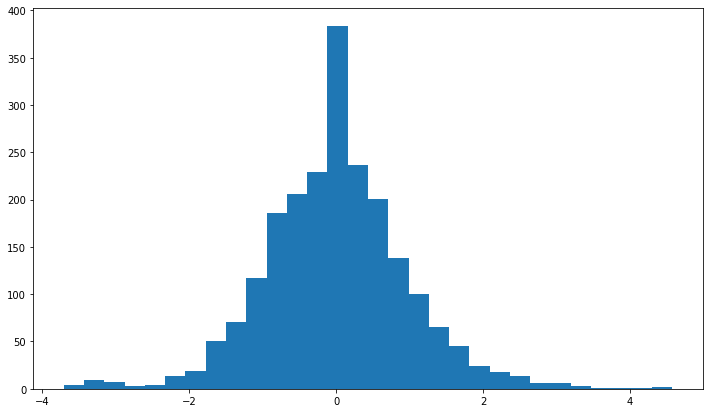

In [87]:
plt.figure(figsize = (12, 7))
plt.hist(df_round_5.CI_ln, bins=30)
print(df_round_5.CI_ln.quantile(0.01), df_round_5.CI_ln.quantile(0.99))
plt.show()

## Insights
1. Сделаем аналогичную операцию с квантилями и для CI_ln and PROFIT_PARTNER_ln.

In [88]:
df_round_6 = df_round_5.copy()

left_q_ci = df_round_6.CI_ln.quantile(0.01)
right_q_ci = df_round_6.CI_ln.quantile(0.99)
left_q_partner = df_round_6.PROFIT_PARTNER_ln.quantile(0.03)
right_q_partner = df_round_6.PROFIT_PARTNER_ln.quantile(0.99)

df_round_6.CI_ln = df_round_6.CI_ln.apply(lambda x : x if x <= right_q_ci else right_q_ci)
df_round_6.CI_ln = df_round_6.CI_ln.apply(lambda x : x if x >= left_q_ci else left_q_ci)

df_round_6.PROFIT_PARTNER_ln = df_round_6.PROFIT_PARTNER_ln.apply(lambda x : x if x <= right_q_partner else right_q_partner)
df_round_6.PROFIT_PARTNER_ln = df_round_6.PROFIT_PARTNER_ln.apply(lambda x : x if x >= left_q_partner else left_q_partner)


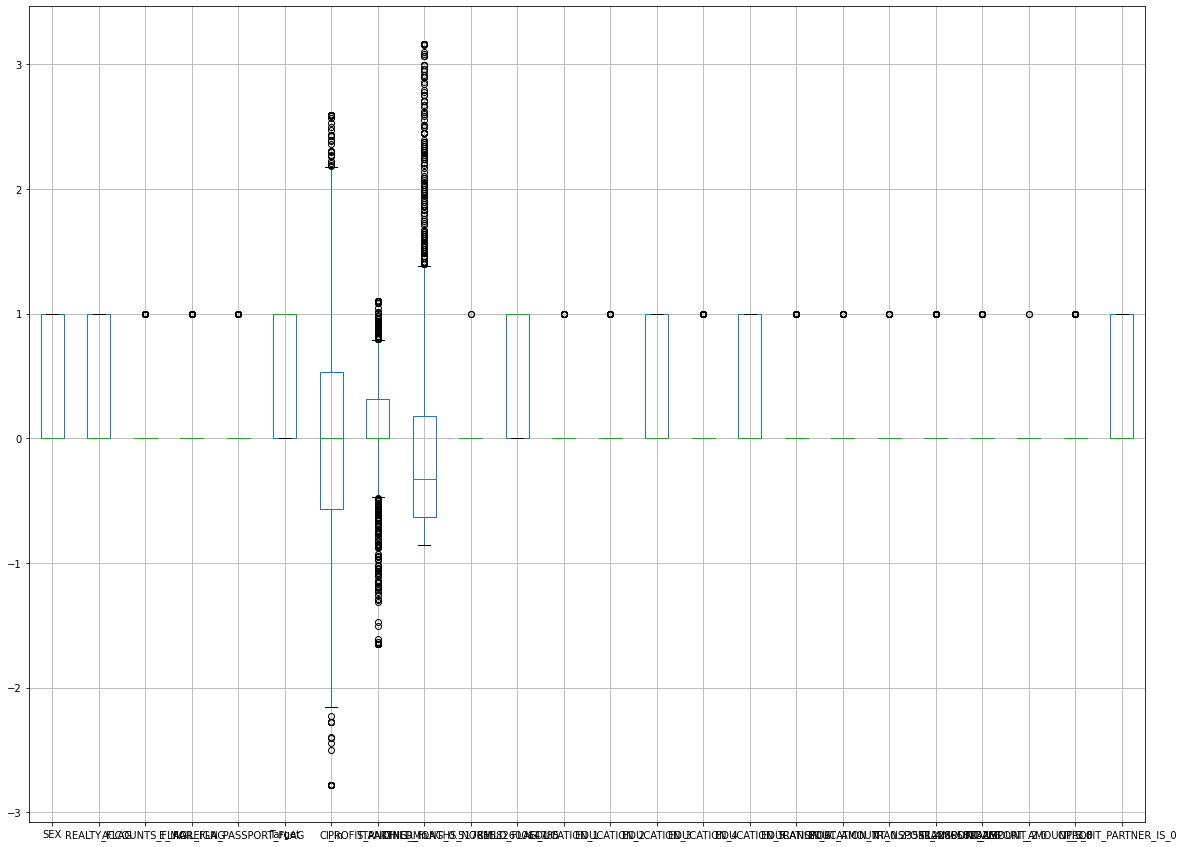

In [89]:
plt.figure(figsize = (20, 15))
boxplot = df_round_6.boxplot()

## Baseline 1:
1. Рассмотреть 2 датасета: с выполненными dummy и без.
2. Используем Логрег с L1, L2 регуляризациями; Random forest; LightGBM; NN

После бэйзлайна проведем следующий раунд корректировки датасетов. И будем добавлять интерпретацию результатов. Использовать уменьшение размерности с помощью SVD не будем, так как важно сохранить интерпретируемость результатов.

In [90]:
df_round_5_inheritance = df_round_5.copy()
df_round_5_inheritance.drop("Target", axis=1, inplace=True)
df_round_6_inheritance = df_round_6.copy()
df_round_6_inheritance.drop("Target", axis=1, inplace=True)

datasets_features = [df_round_5_inheritance, df_round_6_inheritance]
targets = df_round_5.Target
dataset_labels =[targets for _ in datasets_features]

In [91]:
# By the way, classes are balanced:
print(targets.mean())

0.5002311604253352


## LogReg

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from time import time
import lightgbm as lgb
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")


In [93]:
def pipe_model(X, y, model_generator, params, number_of_tests=5):
    prec_list, rec_list, f1_list, roc_auc_list = [], [], [], []
    for i in range(number_of_tests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        model = model_generator(params)
        model.fit(X_train, y_train)

        y_test_for_roc = np.zeros((y_test.shape[0], 2))
        for ind, el in enumerate(y_test):
            if el == 0:
                y_test_for_roc[ind, 0] = 1
            else:
                y_test_for_roc[ind, 1] = 1

        y_pred_proba = model.predict_proba(X_test)
        y_pred = model.predict(X_test)

        prec_list.append(precision_score(y_test, y_pred))
        rec_list.append(recall_score(y_test, y_pred))
        f1_list.append(f1_score(y_test, y_pred))
        roc_auc_list.append(roc_auc_score(y_test_for_roc, y_pred_proba))

    return np.mean(prec_list), np.mean(rec_list), np.mean(f1_list), np.mean(roc_auc_list)

In [94]:
def logreg_model_generator(parameters):
    return LogisticRegression(**parameters)

c_checking_list = np.linspace(1e-2, 1, 10)
penalty_list = ["none", "l1", "l2", "elasticnet"]

list_of_parameters = []
for c in c_checking_list:
    for penalty in penalty_list:
        params = {"penalty" : penalty, "C" : c, "solver" : "saga"}
        if penalty == "elasticnet":
            params["l1_ratio"] = 0.5
        list_of_parameters.append(params)

for ind_of_dataset, (X, y) in enumerate(zip(datasets_features, dataset_labels)):
    print("==========")
    print("dataset number:", ind_of_dataset)

    res_list = []
    optim_params = None
    optim_res = None
    optim_f1 = 0

    for ind, params in enumerate(list_of_parameters):
        res_metrics = pipe_model(X, y, logreg_model_generator, params)
        res_list.append(res_metrics)

        prec, rec, f1, roc_auc = res_metrics

        if f1 > optim_f1:
            optim_params = params
            optim_res = res_metrics
            optim_f1 = f1

    prec, rec, f1, roc_auc = optim_res
    print(optim_params)
    print("precision:", prec)
    print("recall:", rec)
    print("f1:", f1)
    print("roc-auc:", roc_auc)

dataset number: 0
{'penalty': 'elasticnet', 'C': 0.12, 'solver': 'saga', 'l1_ratio': 0.5}
precision: 0.677867853378776
recall: 0.7052833942552132
f1: 0.6907749153324614
roc-auc: 0.7439810564901677
dataset number: 1
{'penalty': 'l2', 'C': 0.01, 'solver': 'saga'}
precision: 0.6561902567138207
recall: 0.7235065564894819
f1: 0.687722966924379
roc-auc: 0.7417867394664057


### Results LogReg:
1. Качество результатов не сильно зависит от созданного датасета -- в пределах 1-2 %.
2. precision < 0.7 -- это достаточно плохое качество модели

## SHAP for LogReg

In [95]:
import numpy as np
import shap

shap.initjs()

params = {"penalty" : "l2", "C" : 0.45, "solver" : "saga"}

X = datasets_features[1]
y = dataset_labels[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression(**params)
model.fit(X_train, y_train)

LogisticRegression(C=0.45, solver='saga')

In [96]:
explainer = shap.Explainer(model, X_train, feature_names=X_train.columns)
shap_values = explainer(X_test)

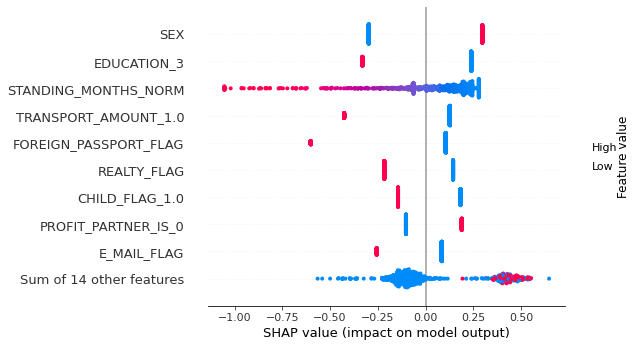

In [97]:
shap.plots.beeswarm(shap_values)

In [98]:
ind = 0
shap.plots.force(shap_values[ind])

In [99]:
ind = 1
shap.plots.force(shap_values[ind])

## RandomForest

In [100]:
def randomforest_model_generator(parameters):
    return RandomForestClassifier(**parameters)

max_depth_list = np.arange(5, 26, 5)
n_estimators_list = np.arange(20, 200, 40)
min_samples_split_list = np.arange(2, 10, 2)

list_of_parameters = []
for max_depth in max_depth_list:
    for n_estimators in n_estimators_list:
        for min_samples_split in min_samples_split_list:
            params = {"max_depth" : max_depth, "n_estimators" : n_estimators, "min_samples_split" : min_samples_split}
            list_of_parameters.append(params)

optim_res_list = []
optim_params_list = []

for ind_of_dataset, (X, y) in enumerate(zip(datasets_features, dataset_labels)):
    print("==========")
    print("dataset number:", ind_of_dataset)

    res_list = []
    optim_params = None
    optim_res = None
    optim_f1 = 0

    for ind, params in enumerate(list_of_parameters):
        print("----------")
        print(f"parameters number:, {ind}/{len(list_of_parameters)}")
        t1 = time()
        res_metrics = pipe_model(X, y, randomforest_model_generator, params)
        res_list.append(res_metrics)

        prec, rec, f1, roc_auc = res_metrics

        if f1 > optim_f1:
            optim_params = params
            optim_res = res_metrics
            optim_f1 = f1

        t2 = time()
        print("execution time:", t2 - t1)

    optim_res_list.append(optim_res)
    optim_params_list.append(optim_params)

    prec, rec, f1, roc_auc = optim_res
    print(optim_params)
    print("precision:", prec)
    print("recall:", rec)
    print("f1:", f1)
    print("roc-auc:", roc_auc)

dataset number: 0
----------
parameters number:, 0/100
execution time: 0.1620638370513916
----------
parameters number:, 1/100
execution time: 0.15369319915771484
----------
parameters number:, 2/100
execution time: 0.16283917427062988
----------
parameters number:, 3/100
execution time: 0.1556260585784912
----------
parameters number:, 4/100
execution time: 0.3785715103149414
----------
parameters number:, 5/100
execution time: 0.3867759704589844
----------
parameters number:, 6/100
execution time: 0.37308168411254883
----------
parameters number:, 7/100
execution time: 0.3707418441772461
----------
parameters number:, 8/100
execution time: 0.6249327659606934
----------
parameters number:, 9/100
execution time: 0.6228082180023193
----------
parameters number:, 10/100
execution time: 0.6102621555328369
----------
parameters number:, 11/100
execution time: 0.6077053546905518
----------
parameters number:, 12/100
execution time: 0.8473098278045654
----------
parameters number:, 13/100
ex

In [101]:
for ind, (optim_res, optim_params) in enumerate(zip(optim_res_list, optim_params_list)):
    print("==========")
    print("dataset number:", ind)
    prec, rec, f1, roc_auc = optim_res
    print(optim_params)
    print("precision:", prec)
    print("recall:", rec)
    print("f1:", f1)
    print("roc-auc:", roc_auc)

dataset number: 0
{'max_depth': 5, 'n_estimators': 60, 'min_samples_split': 6}
precision: 0.6643336659130343
recall: 0.6894391937150458
f1: 0.675849395440453
roc-auc: 0.7278739864396895
dataset number: 1
{'max_depth': 5, 'n_estimators': 60, 'min_samples_split': 4}
precision: 0.6659364852735663
recall: 0.6857832836890067
f1: 0.6752602900318407
roc-auc: 0.7292542385163843


### Results RandomForest:
Результаты полностью аналогичны результатам для LogReg:
1. Качество результатов не сильно зависит от созданного датасета -- в пределах 1-2 %.
2. precision < 0.7 -- это достаточно плохое качество модели

## LightGBM

In [102]:
def lightgbm_model_generator(parameters):
    return LGBMClassifier(**parameters)

params_base = {"objective" : "binary",
               "num_iterations" : 100,
               "num_leaves" : 31,
               }

max_depth_list = np.arange(1, 6, 1)
min_samples_leaf_list = np.arange(10, 40, 7)
learning_rate_list = [0.1, 0.03, 0.01, 0.003, 0.001]

list_of_parameters = []
for max_depth in max_depth_list:
    for learning_rate in learning_rate_list:
        for min_samples_leaf in min_samples_leaf_list:
            params = params_base
            params["max_depth"] = max_depth
            params["learning_rate"] = learning_rate
            params["min_data_in_leaf"] = min_samples_leaf
            list_of_parameters.append(params)

optim_res_list = []
optim_params_list = []

for ind_of_dataset, (X, y) in enumerate(zip(datasets_features, dataset_labels)):
    print("==========")
    print("dataset number:", ind_of_dataset)

    res_list = []
    optim_params = None
    optim_res = None
    optim_f1 = 0

    for ind, params in enumerate(list_of_parameters):
        print("----------")
        print(f"parameters number:, {ind}/{len(list_of_parameters)}")
        t1 = time()
        res_metrics = pipe_model(X, y, lightgbm_model_generator, params)
        res_list.append(res_metrics)

        prec, rec, f1, roc_auc = res_metrics

        if f1 > optim_f1:
            optim_params = params
            optim_res = res_metrics
            optim_f1 = f1

        t2 = time()
        print("execution time:", t2 - t1)

    optim_res_list.append(optim_res)
    optim_params_list.append(optim_params)

    prec, rec, f1, roc_auc = optim_res
    print(optim_params)
    print("precision:", prec)
    print("recall:", rec)
    print("f1:", f1)
    print("roc-auc:", roc_auc)

dataset number: 0
----------
parameters number:, 0/125
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
execution time: 0.23311471939086914
----------
parameters number:, 1/125
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warnin

In [103]:
for ind, (optim_res, optim_params) in enumerate(zip(optim_res_list, optim_params_list)):
    print("==========")
    print("dataset number:", ind)
    prec, rec, f1, roc_auc = optim_res
    print(optim_params)
    print("precision:", prec)
    print("recall:", rec)
    print("f1:", f1)
    print("roc-auc:", roc_auc)

dataset number: 0
{'objective': 'binary', 'num_iterations': 100, 'num_leaves': 31, 'max_depth': 5, 'learning_rate': 0.001, 'min_data_in_leaf': 38}
precision: 0.6069245236898989
recall: 0.7374114611105833
f1: 0.6643617378120206
roc-auc: 0.6857516748239341
dataset number: 1
{'objective': 'binary', 'num_iterations': 100, 'num_leaves': 31, 'max_depth': 5, 'learning_rate': 0.001, 'min_data_in_leaf': 38}
precision: 0.6129367631403955
recall: 0.7518365307984368
f1: 0.670306830422237
roc-auc: 0.6983041809434235


## Results 1 LightGBM:
Мы увидели тенденцию в обучении LightGBM: это высокий recall при достаточно низком precision. Это обусловлено тем, что оптимизация производится по f1 score. Параметры, которые следует изменять в следующей фазе тюнинга параметров: num_iterations, max_depth, num_leaves

In [104]:
def lightgbm_model_generator(parameters):
    return LGBMClassifier(**parameters)

params_base = {"objective" : "binary",
               "learning_rate" : 0.001,
               }

max_depth_list = np.arange(5, 16, 2)
num_iterations_list = np.arange(100, 301, 100)
num_leaves_list = np.arange(20, 101, 20)
min_data_in_leaf_list = np.arange(20, 101, 20)

list_of_parameters = []
for max_depth in max_depth_list:
    for num_iterations in num_iterations_list:
        for num_leaves in num_leaves_list:
            for min_data_in_leaf in min_data_in_leaf_list:
                params = params_base
                params["max_depth"] = max_depth
                params["num_iterations"] = num_iterations
                params["num_leaves"] = num_leaves
                params["min_data_in_leaf"] = min_data_in_leaf
                list_of_parameters.append(params)

optim_res_list = []
optim_params_list = []

for ind_of_dataset, (X, y) in enumerate(zip(datasets_features, dataset_labels)):
    print("==========")
    print("dataset number:", ind_of_dataset)

    res_list = []
    optim_params = None
    optim_res = None
    optim_f1 = 0

    for ind, params in enumerate(list_of_parameters):
        print("----------")
        print(f"parameters number:, {ind}/{len(list_of_parameters)}")
        t1 = time()
        res_metrics = pipe_model(X, y, lightgbm_model_generator, params)
        res_list.append(res_metrics)

        prec, rec, f1, roc_auc = res_metrics

        if f1 > optim_f1:
            optim_params = params
            optim_res = res_metrics
            optim_f1 = f1

        t2 = time()
        print("execution time:", t2 - t1)

    optim_res_list.append(optim_res)
    optim_params_list.append(optim_params)

    prec, rec, f1, roc_auc = optim_res
    print(optim_params)
    print("precision:", prec)
    print("recall:", rec)
    print("f1:", f1)
    print("roc-auc:", roc_auc)

dataset number: 0
----------
parameters number:, 0/450
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
execution time: 0.4736475944519043
----------
parameters number:, 1/450
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[Ligh

In [105]:
for ind, (optim_res, optim_params) in enumerate(zip(optim_res_list, optim_params_list)):
    print("==========")
    print("dataset number:", ind)
    prec, rec, f1, roc_auc = optim_res
    print(optim_params)
    print("precision:", prec)
    print("recall:", rec)
    print("f1:", f1)
    print("roc-auc:", roc_auc)

dataset number: 0
{'objective': 'binary', 'learning_rate': 0.001, 'max_depth': 15, 'num_iterations': 300, 'num_leaves': 100, 'min_data_in_leaf': 100}
precision: 0.6626311034402599
recall: 0.6669079107216206
f1: 0.6633424456334126
roc-auc: 0.7148266618834564
dataset number: 1
{'objective': 'binary', 'learning_rate': 0.001, 'max_depth': 15, 'num_iterations': 300, 'num_leaves': 100, 'min_data_in_leaf': 100}
precision: 0.6673331916499374
recall: 0.6719925726568653
f1: 0.6664027932407358
roc-auc: 0.72299307611844


## ## Results 2 LightGBM:
При дальнейшем тюнинге параметров модель также не позволяет добиться хорошего скора.
Попробуем еще обучить небольшую НН, чтобы точно понять, что проблема кроется в плохом созданном датасете.

## Neural Network

In [106]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

def convert_labels_to_matrix(y):
    y_test_for_roc = np.zeros((y.shape[0], 2), dtype="float32")
    for ind, el in enumerate(y):
        if el == 0:
            y_test_for_roc[ind, 0] = 1
        else:
            y_test_for_roc[ind, 1] = 1
    return y_test_for_roc


def convert_labels_to_array(y_matrix):
    y = []
    for row in y_matrix:
        if row[0] == 1:
            y.append(0)
        else:
            y.append(1)

    return np.array(y)


class TinyNeuralNetwork(nn.Module):
    def __init__(self, device, model, need_weights_zeroing=True):
        super().__init__()
        self.device = device
        self.model = model
        self.model.to(self.device)

        if need_weights_zeroing:
            self.init_weights()

        self.init_criterion()
        self.init_optimizer()

    def init_weights(self):
        for ind, layer in enumerate(self.model):
            if ind % 2 == 0:
                torch.nn.init.xavier_uniform(layer.weight)

    def init_criterion(self, criterion=None):
        self.criterion = criterion or nn.BCELoss()

    def init_optimizer(self, optimizer=None):
        self.optimizer = optimizer or optim.Adam(self.model.parameters(), lr=0.001)

    def forward(self, inp):
        out = self.model(inp)
        return out

    def train(self, train_loader, test_loader, epoch_number=2):
        self.loss_list = []
        self.epoch_list = []
        self.precision_train = []
        self.precision_test = []
        self.recall_train = []
        self.recall_test = []
        self.f1_score_train = []
        self.f1_score_test = []
        self.roc_auc_score_train = []
        self.roc_auc_score_test = []
        self.learning_time = []
        total_time = time()

        for epoch in range(epoch_number):  # loop over the dataset multiple times
            print("=========================")
            print(f"epoch: {epoch + 1}/{epoch_number}")
            print(f"processing...")
            running_loss = 0.0
            epoch_time = time()
            for i, data in enumerate(train_loader, 0):
                # get the inputs; data is a list of [inputs, labels]
                inputs, labels = data
                inputs = inputs.to(self.device)
                labels = labels.to(self.device)

                # zero the parameter gradients
                self.optimizer.zero_grad()

                # forward + backward + optimize
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()

                # print statistics
                running_loss += loss.item()

            self.epoch_list.append(epoch)
            self.loss_list.append(running_loss)
            prec_train, rec_train, f1_train, roc_auc_train = self.metrics(train_loader)
            prec_test, rec_test, f1_test, roc_auc_test = self.metrics(test_loader)
            self.precision_train.append(prec_train)
            self.precision_test.append(prec_test)
            self.recall_train.append(rec_train)
            self.recall_test.append(rec_test)
            self.f1_score_train.append(f1_train)
            self.f1_score_test.append(f1_test)
            self.roc_auc_score_train.append(roc_auc_train)
            self.roc_auc_score_test.append(roc_auc_test)
            epoch_time_done = time() - epoch_time
            self.learning_time.append(epoch_time_done)

            print(f"running time: {round(epoch_time_done, 3)}")
            print(f"running loss: {round(running_loss, 3)}")
            print(f"train f1: {round(f1_train, 3)}")
            print(f"test f1: {round(f1_test, 3)}")
            print(f"train roc-auc: {round(roc_auc_train, 3)}")
            print(f"test roc-auc: {round(roc_auc_test, 3)}")

        print("=========================")
        print('Finished Training')

    def predict_proba(self, test_loader):
        predicted_proba = []
        with torch.no_grad():
            for data in test_loader:
                images, labels = data
                images = images.to(self.device)
                outputs = self.model(images)
                predicted_proba.append(outputs)

        joined_predicted = predicted_proba[0]
        for ind, el in enumerate(predicted_proba):
            if ind > 0:
                joined_predicted = torch.cat((joined_predicted, el))

        return joined_predicted.to("cpu")

    def predict(self, test_loader):
        predicted_list = []
        with torch.no_grad():
            for data in test_loader:
                images, labels = data
                images = images.to(self.device)
                outputs = self.model(images)
                _, predicted = torch.max(outputs.data, 1)
                predicted_list.append(predicted)

        joined_predicted = predicted_list[0]
        for ind, el in enumerate(predicted_list):
            if ind > 0:
                joined_predicted = torch.cat((joined_predicted, el))

        return joined_predicted.to("cpu")

    def metrics(self, test_loader):
        true_labels = []
        for data in test_loader:
            images, labels = data
            true_labels.append(labels)

        joined_true = true_labels[0]
        for ind, el in enumerate(true_labels):
            if ind > 0:
                joined_true = torch.cat((joined_true, el))
        y_true = convert_labels_to_array(joined_true)

        y_pred_proba = self.predict_proba(test_loader)
        y_pred = self.predict(test_loader)

        prec = precision_score(y_true, y_pred)
        rec = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        roc_auc = roc_auc_score(joined_true, y_pred_proba)
        return 100 * prec, 100 * rec, 100 * f1, 100 * roc_auc

    def plot_train_history(self):
        plt.figure(figsize = (16,10))
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(20, 12)

        ax1.plot(self.epoch_list, self.loss_list, "b", label="train loss")
        ax1.legend()
        ax1.set_xlabel("iteration")
        ax1.set_ylabel("loss")

        ax2.plot(self.epoch_list, self.f1_score_train, "b", label="train f1")
        ax2.plot(self.epoch_list, self.f1_score_test, "g", label="test r1")
        ax2.plot(self.epoch_list, self.roc_auc_score_train, "r", label="train roc-auc")
        ax2.plot(self.epoch_list, self.roc_auc_score_test, "magenta", label="test roc-auc")
        ax2.legend()
        ax2.set_xlabel("iteration")
        ax2.set_ylabel("accuracy")

        plt.show()

In [107]:
X = datasets_features[1]
y = dataset_labels[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

y_train_matrix = convert_labels_to_matrix(y_train)
y_test_matrix = convert_labels_to_matrix(y_test)

class Data(Dataset):
    def __init__(self, X_train, y_train):
        x = X_train.to_numpy(dtype="float32")
        y = y_train
        #y = np.array(y_train, dtype="float32")
        self.x = torch.from_numpy(x)
        self.y = torch.from_numpy(y)
        self.len = self.x.shape[0]

    def __getitem__(self,index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

data_train = Data(X_train, y_train_matrix)
data_test = Data(X_test, y_test_matrix)

pow_of_batch = 12
batch_size = 2 ** pow_of_batch
train_loader = DataLoader(dataset=data_train, batch_size=batch_size)
test_loader = DataLoader(dataset=data_test, batch_size=batch_size)



In [108]:
input_shape = X.shape[1]
output_shape = 2
hidden_shape_1 = input_shape * 3
hidden_shape_2 = input_shape * 1
number_of_layers = 2

layers = []
layers.append(nn.Linear(input_shape, hidden_shape_1))
layers.append(nn.ReLU())
for i in range(number_of_layers):
    layers.append(nn.Linear(hidden_shape_1, hidden_shape_2))
    layers.append(nn.Tanh())
    layers.append(nn.Linear(hidden_shape_2, hidden_shape_1))
    layers.append(nn.Tanh())

layers.append(nn.Linear(hidden_shape_1, output_shape))
layers.append(nn.Softmax())
model = nn.Sequential(*layers)

In [109]:
epoch_number = 200
device = "cuda:0"
net = TinyNeuralNetwork(device, model, need_weights_zeroing=True)
net.train(train_loader, test_loader, epoch_number=epoch_number)

epoch: 1/200
processing...
running time: 0.078
running loss: 0.717
train f1: 50.131
test f1: 52.042
train roc-auc: 49.391
test roc-auc: 53.559
epoch: 2/200
processing...
running time: 0.048
running loss: 0.7
train f1: 56.726
test f1: 57.312
train roc-auc: 56.526
test roc-auc: 61.017
epoch: 3/200
processing...
running time: 0.048
running loss: 0.686
train f1: 62.847
test f1: 64.865
train roc-auc: 61.785
test roc-auc: 66.581
epoch: 4/200
processing...
running time: 0.049
running loss: 0.674
train f1: 65.301
test f1: 66.087
train roc-auc: 64.888
test roc-auc: 69.64
epoch: 5/200
processing...
running time: 0.05
running loss: 0.664
train f1: 65.284
test f1: 66.272
train roc-auc: 66.775
test roc-auc: 71.341
epoch: 6/200
processing...
running time: 0.048
running loss: 0.655
train f1: 65.556
test f1: 67.368
train roc-auc: 67.941
test roc-auc: 72.292
epoch: 7/200
processing...
running time: 0.049
running loss: 0.648
train f1: 66.255
test f1: 66.767
train roc-auc: 68.727
test roc-auc: 73.074
epo

<Figure size 1152x720 with 0 Axes>

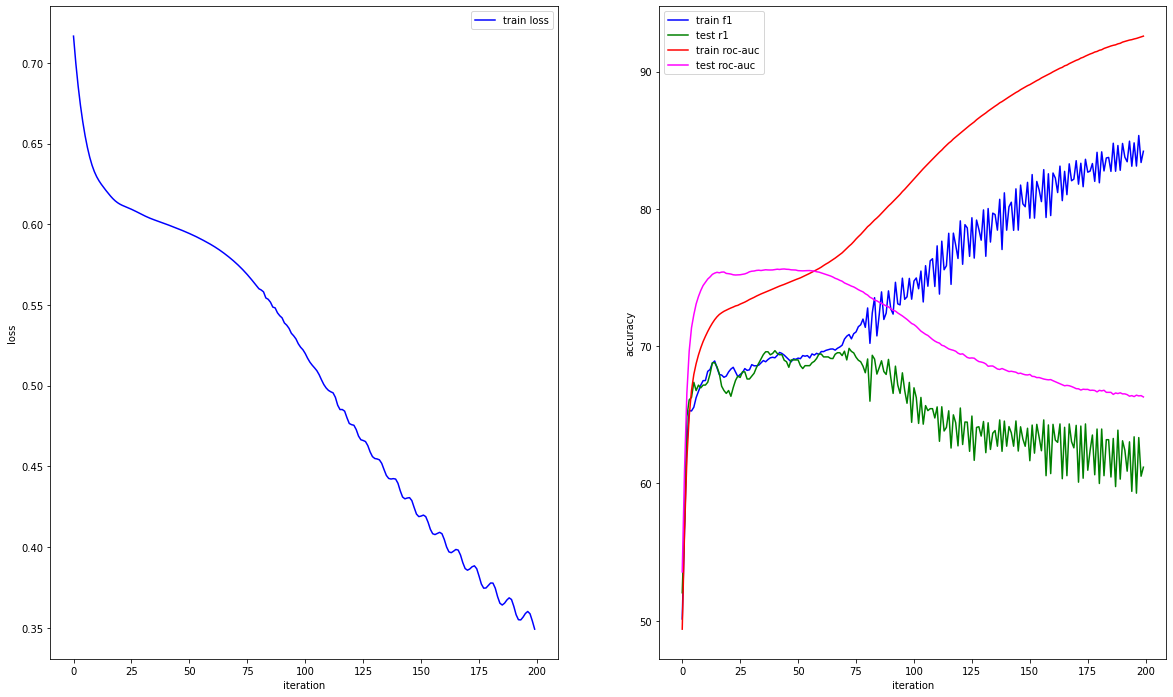

In [110]:
net.plot_train_history()

Здесь можно наблюдать пример явного переобучения

In [111]:
epoch_number = 1000
device = "cuda:0"
net = TinyNeuralNetwork(device, model, need_weights_zeroing=True)
net.train(train_loader, test_loader, epoch_number=epoch_number)

epoch: 1/1000
processing...
running time: 0.056
running loss: 0.708
train f1: 38.261
test f1: 38.563
train roc-auc: 49.396
test roc-auc: 50.867
epoch: 2/1000
processing...
running time: 0.06
running loss: 0.696
train f1: 63.311
test f1: 62.583
train roc-auc: 58.52
test roc-auc: 61.94
epoch: 3/1000
processing...
running time: 0.063
running loss: 0.687
train f1: 66.163
test f1: 66.325
train roc-auc: 64.392
test roc-auc: 68.495
epoch: 4/1000
processing...
running time: 0.057
running loss: 0.68
train f1: 66.554
test f1: 67.995
train roc-auc: 67.024
test roc-auc: 70.849
epoch: 5/1000
processing...
running time: 0.053
running loss: 0.672
train f1: 66.587
test f1: 66.379
train roc-auc: 68.22
test roc-auc: 71.745
epoch: 6/1000
processing...
running time: 0.058
running loss: 0.664
train f1: 66.077
test f1: 67.166
train roc-auc: 68.879
test roc-auc: 72.186
epoch: 7/1000
processing...
running time: 0.055
running loss: 0.657
train f1: 65.529
test f1: 66.977
train roc-auc: 69.358
test roc-auc: 72.5

<Figure size 1152x720 with 0 Axes>

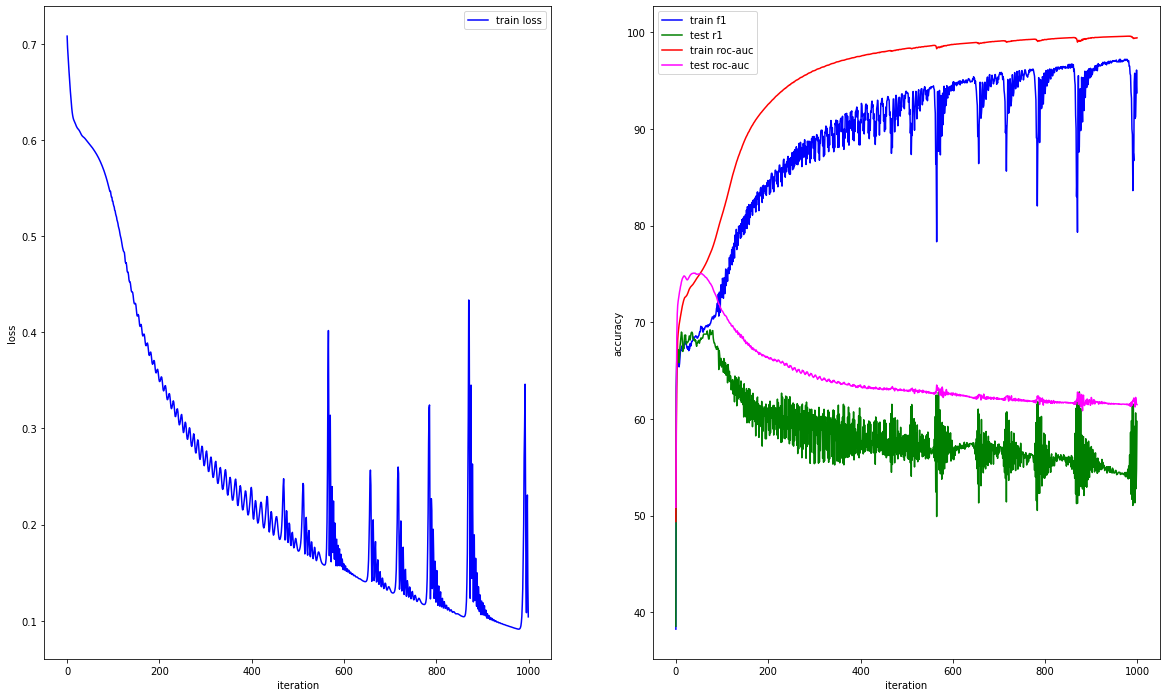

In [112]:
net.plot_train_history()